Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4436 - acc: 0.8812 - val_loss: 0.2194 - val_acc: 0.9403
Epoch 2/10
 - 2s - loss: 0.1919 - acc: 0.9450 - val_loss: 0.1560 - val_acc: 0.9557
Epoch 3/10
 - 2s - loss: 0.1360 - acc: 0.9616 - val_loss: 0.1264 - val_acc: 0.9646
Epoch 4/10
 - 2s - loss: 0.1032 - acc: 0.9704 - val_loss: 0.1128 - val_acc: 0.9679
Epoch 5/10
 - 2s - loss: 0.0813 - acc: 0.9775 - val_loss: 0.0984 - val_acc: 0.9718
Epoch 6/10
 - 2s - loss: 0.0662 - acc: 0.9816 - val_loss: 0.0935 - val_acc: 0.9720
Epoch 7/10
 - 2s - loss: 0.0546 - acc: 0.9851 - val_loss: 0.0914 - val_acc: 0.9735
Epoch 8/10
 - 2s - loss: 0.0459 - acc: 0.9878 - val_loss: 0.0827 - val_acc: 0.9765
Epoch 9/10
 - 2s - loss: 0.0381 - acc: 0.9901 - val_loss: 0.0824 - val_acc: 0.9759
Epoch 10/10
 - 2s - loss: 0.0315 - acc: 0.9917 - val_loss: 0.0802 - val_acc: 0.9760
10000/10000 [==============================] - 0s 36us/step

準確率= 0.9763


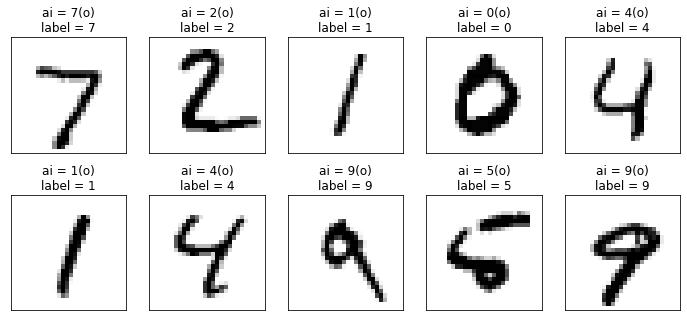

In [5]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def show_image_labels_predictions(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        #有AI預測結果資料，才在標題顯示結果
        if(len(predictions)>0):
            title = "ai = " + str(predictions[start_id])
            #預測正確顯示(o)，錯誤顯示(x)
            title += ('(o)' if predictions[start_id]==labels[start_id] else '(x)')
            title += '\nlabel = ' + str(labels[start_id])
         #沒有AI預測結果資料，只在標題顯示真實數據
        else:
            title = 'label = ' + str(labels[start_id])
         #X,Y軸不顯示刻度
        ax.set_title(title,fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()
#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤
(train_feature, train_label),(test_feature,test_label) = mnist.load_data()

#將Features特徵值轉換為784個float數字的一維向量
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

#Features特徵值標準化
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

#label轉換為One-Hot Encoding編碼
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

#建立模型
model = Sequential()

#輸入層:784，隱藏層:256，輸出層:10
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

#定義訓練方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#以(train_feature_normalize,train_label_onehot)資料訓練
#訓練資料保留20%做驗證，訓練10次，每批次讀取200筆資料，顯示簡易過程
train_history = model.fit(x = train_feature_normalize,y = train_label_onehot,validation_split=0.2
                          ,epochs=10,batch_size=200,verbose=2)

#評估準確率
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

#預測
prediction = model.predict_classes(test_feature_normalize)

#顯示圖像、預測值、真實性
show_image_labels_predictions(test_feature,test_label,prediction,0)